In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

BEFORE REMOVING OUTLIERS USING 1.5 IQR


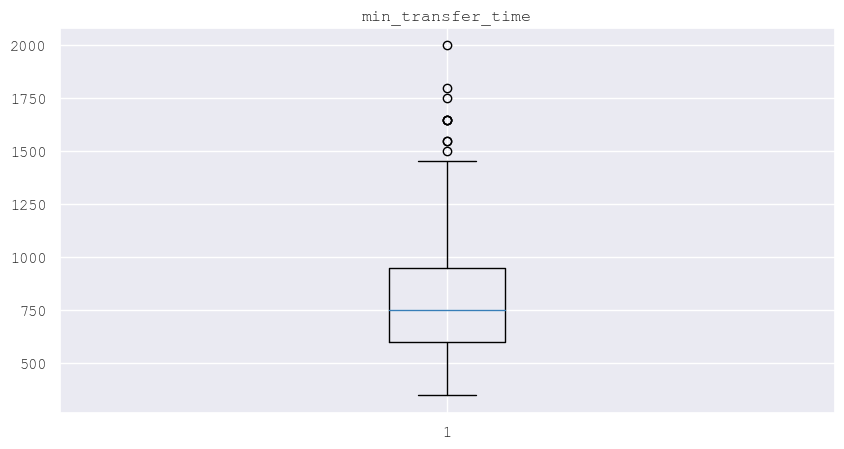

AFTER REMOVING OUTLIERS USING 1.5 IQR


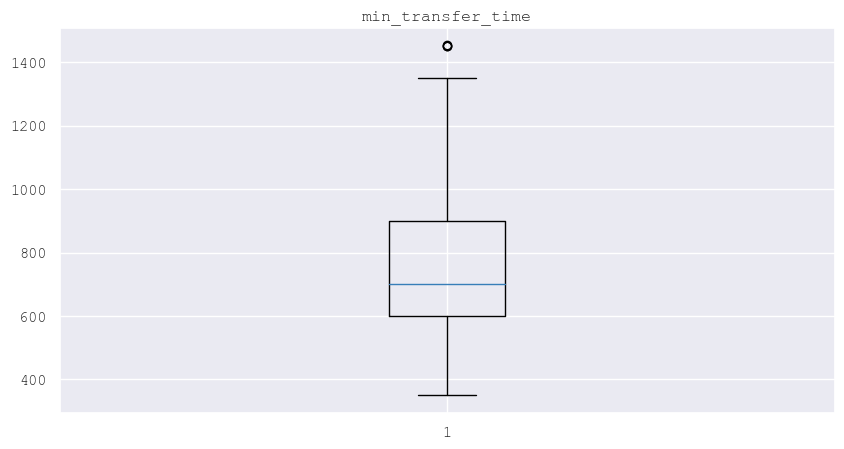

,player_id,position,min_transfer_time
0,1080,third_base,550
1,1119,third_base,700
2,1144,shortstop,900
3,1181,shortstop,550
4,1258,third_base,800


In [10]:
inf_throw_gb_df = pd.read_csv('../../data/derived/plays/inf_gb_with_throw_1b_df.csv').drop('Unnamed: 0', axis=1)
game_info_df = pd.read_csv('../../data/combined/game_info.csv').drop(columns=['Unnamed: 0'])

pos_dict = {4:'second_base', 5:'third_base', 6:'shortstop'}
df_w_id = pd.merge(inf_throw_gb_df, game_info_df, on=['game_str', 'play_per_game'])
df_w_id = df_w_id[['player_position', 'acquire_time', 'throw_time', '1b_receive_time', 'second_base', 'third_base', 'shortstop']]

tt_player_df = pd.DataFrame()
tt_player_df['player_id'] = df_w_id.apply(lambda row: row[pos_dict[row['player_position']]], axis=1)
tt_player_df['transfer_time'] = df_w_id['throw_time'] - df_w_id['acquire_time']
# tt_player_df['player_position_num'] = df_w_id['player_position']
tt_player_df['position_on_play'] = df_w_id['player_position'].apply(lambda x: pos_dict[x])

# Give each player_id a unique position based on the one that occurs the most
tt_player_df['position'] = tt_player_df.groupby('player_id')['position_on_play'].transform(lambda x: x.value_counts().index[0])

def box_plot(df, col):
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

min_tt_player_df = tt_player_df.groupby(['player_id', 'position'])['transfer_time'].min()
min_tt_player_df = min_tt_player_df.reset_index()
min_tt_player_df = min_tt_player_df.rename(columns={'transfer_time': 'min_transfer_time'})

print('BEFORE REMOVING OUTLIERS USING 1.5 IQR')
box_plot(min_tt_player_df, 'min_transfer_time')

# eliminate outliers on min_transfer_time using 1.5 IQR rule
min_tt_q1 = min_tt_player_df['min_transfer_time'].quantile(0.25)
min_tt_q3 = min_tt_player_df['min_transfer_time'].quantile(0.75)

min_tt_iqr = min_tt_q3 - min_tt_q1
min_tt_lower_bound = min_tt_q1 - (1.5 * min_tt_iqr)
min_tt_upper_bound = min_tt_q3 + (1.5 * min_tt_iqr)

min_tt_player_df = min_tt_player_df[(min_tt_player_df['min_transfer_time'] > min_tt_lower_bound) & (min_tt_player_df['min_transfer_time'] < min_tt_upper_bound)]

print('AFTER REMOVING OUTLIERS USING 1.5 IQR')
box_plot(min_tt_player_df, 'min_transfer_time')

min_tt_player_df.to_csv('../../data/derived/transfer_time/min_tt_player_df.csv')

min_tt_player_df.head()

In [11]:
####################################################################################################################################
#
#
# UNCOMMENT TO SEE VIOLIN PLOT OF TRANSFER TIME BY POSITION (NOT MIN TRANSFER TIME)
#
#
####################################################################################################################################

# plt.figure(figsize=(10, 6))
# sns.set_theme(style="darkgrid")
# sns.set_palette("husl") 

# sns.violinplot(data=tt_player_df,
#                x="transfer_time",
#                y="position",
#                inner="box"
#                )

# sns.boxplot(data=tt_player_df,
#             x="transfer_time",
#             y="position",
#             width=.2,
#             )

# plt.xlabel("Transfer Time (milliseconds)")
# plt.ylabel("Density")
# plt.title("Transfer Time Distribution")
# plt.show()

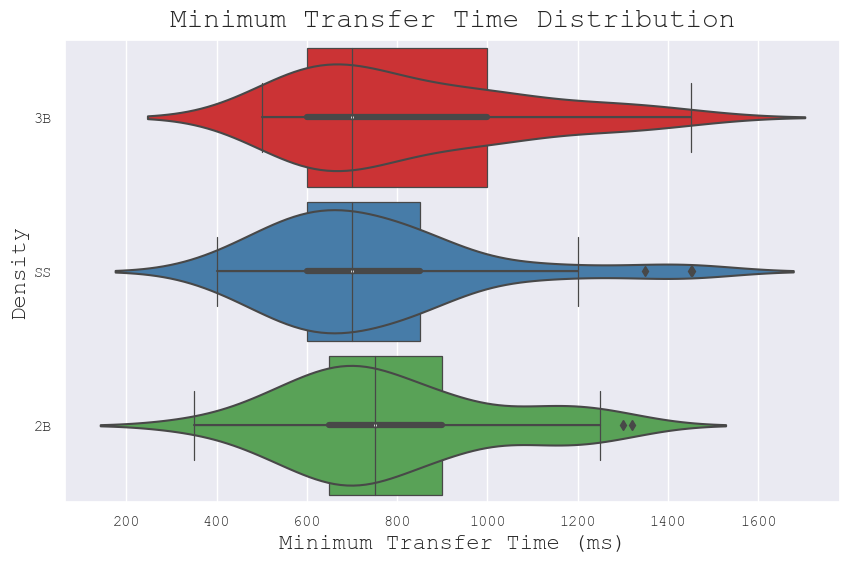

,player_id,position,min_transfer_time
0,1080,third_base,550
1,1119,third_base,700
2,1144,shortstop,900
3,1181,shortstop,550
4,1258,third_base,800


In [12]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")

def map_position_to_abbr(position):
    if position == 'second_base':
        return '2B'
    elif position == 'third_base':
        return '3B'
    else:
        return 'SS'

min_tt_player_df['pos_abrev'] = min_tt_player_df['position'].apply(map_position_to_abbr)

font = {
    'family': 'courier new',
    'size': 15
}
plt.rc('font', **font)

title_font = {
    'family': 'courier new',
    'size': 20,
}

label_font = {
    'family': 'courier new',
    'size': 16,
}

sns.set_palette("Set1") 

# Beeswarm
# sns.swarmplot(data=min_tt_player_df,
#                 x="min_transfer_time",
#                 y="pos_abrev",
#                 size=3,
#                 color="black",
#                 alpha=0.5,
#                 zorder=10,
#                 )

sns.violinplot(data=min_tt_player_df,
               x="min_transfer_time",
               y="pos_abrev",
               inner="box", 
               )

sns.boxplot(data=min_tt_player_df,
            x="min_transfer_time",
            y="pos_abrev",
            width=.9,
            linewidth=0.9,
            zorder=11,
            )

plt.xlabel("Minimum Transfer Time (ms)", fontdict=label_font)
plt.ylabel("Density", fontdict=label_font)
plt.title("Minimum Transfer Time Distribution", fontdict=title_font, pad=10)

plt.show()

min_tt_player_df.drop(columns=['pos_abrev'], inplace=True)
min_tt_player_df.head()

# min_transfer_time .png

In [13]:
# map positions back to numbers
def map_position_to_num(position):
    if position == 'second_base':
        return 4
    elif position == 'third_base':
        return 5
    else:
        return 6
    
min_tt_player_df['player_position'] = min_tt_player_df['position'].apply(map_position_to_num)
min_tt_player_df.drop(columns=['position'], inplace=True)
min_tt_player_df.to_csv('../../data/derived/transfer_time/min_tt_player_df.csv', index=False)